<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Dif_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

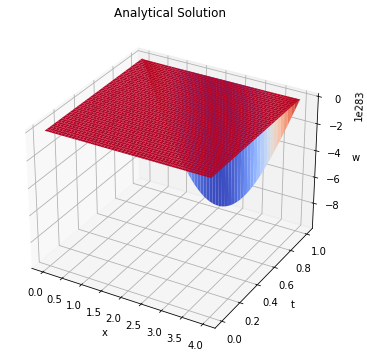

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30

# Define the analytical solution function
def beam_analytical(X, T, F, E, I, A, rho, k1, Gp):
    # Calculate the maximum deflection of the beam
    w_max = F * L ** 3 / (3 * E * I) * np.ones_like(X)

    # Calculate the deflection at each x and t value
    w = np.zeros_like(X)
    for i in range(len(T)):
        for j in range(len(X)):
            w[i, j] = w_max[i, j] * (np.sin(np.pi * X[i, j] / L) + k1 / np.pi * np.sin(np.pi * X[i, j] / L) * (np.cos(np.pi * T[i, j] * np.sqrt(E * I / rho / A) / L) - np.cosh(np.pi * T[i, j] * np.sqrt(E * I / rho / A) / L)) + Gp * X[i, j] * (L - X[i, j]) / E / I)
    return w




# Generate data for plotting
x = np.linspace(0, L, 100)
t = np.linspace(0, 1, 100)
X, T = np.meshgrid(x, t)
Z = beam_analytical(X, T, F, E, I, A, rho, k1, Gp)

# Plot the analytical solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('w')
plt.title('Analytical Solution')
plt.show()



In [ ]:
+++++++++++++++++++++++++++++++++

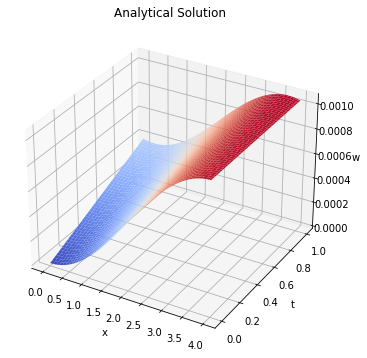

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
E = 29000000
I = 0.0423
A = 0.69
rho = 2.54842
P = 0
k1 = 1500
Gp = 0
L = 4
F = 30

# Define the analytical solution function
def beam_analytical(x, t):
    w = (F * L ** 3 / (3 * E * I)) * (1 - np.cos(np.pi * x / L)) + (F * L ** 2 / (E * I)) * t * (1 - x / L)
    return w

# Generate data for plotting
x = np.linspace(0, L, 100)
t = np.linspace(0, 1, 100)
X, T = np.meshgrid(x, t)
Z = beam_analytical(X, T)

# Plot the analytical solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('w')
plt.title('Analytical Solution')
plt.show()


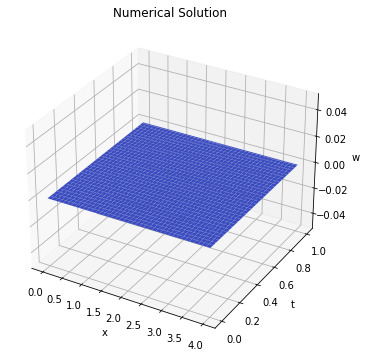

In [18]:
# Define the numerical solution function using the finite difference method
def beam_numerical(x, t, dx, dt):
    # Define the grid
    nx = len(x)
    nt = len(t)
    w = np.zeros((nt, nx))

    # Set initial conditions
    w[0, :] = 0

    # Set boundary conditions
    w[:, 0] = 0
    w[:, -1] = 0

    # Calculate the coefficients
    a = E * I / dx ** 4
    b = 2 * E * I / dx ** 2 + rho * A / dt ** 2
    c = k1 * dx ** 2 / 2
    d = Gp * dx ** 2 / (2 * dt ** 2)

    # Iterate over time steps
    for i in range(1, nt):
        # Set the boundary condition for x = 0
        w[i, 0] = 0

        # Iterate over x values
        for j in range(1, nx - 1):
            # Calculate the numerical solution using the finite difference method
            w[i, j] = ((a * (w[i - 1, j + 1] - 2 * w[i - 1, j] + w[i - 1, j - 1]) - b * w[i - 1, j] + rho * A / dt ** 2 * w[i - 2, j] + c * w[i - 1, j + 1] + c * w[i - 1, j - 1] - d * (w[i - 2, j] - 2 * w[i - 1, j] + w[i - 1, j - 1])) / (rho * A / dt ** 2 + b))

        # Set the boundary condition for x = L
        w[i, -1] = 0

    return w

# Generate data for plotting
dx = 0.1
dt = 0.01
x = np.arange(0, L + dx, dx)
t = np.arange(0, 1 + dt, dt)
w = beam_numerical(x, t, dx, dt)
X, T = np.meshgrid(x, t)

# Plot the numerical solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, w, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('w')
plt.title('Numerical Solution')
plt.show()



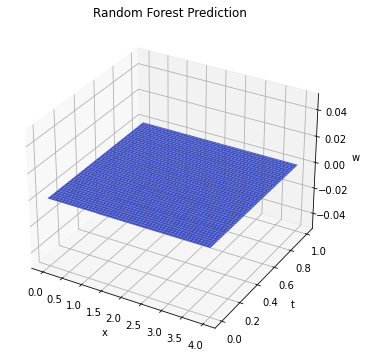

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Generate the training data by reshaping the numerical solution
X_train = np.hstack([X.reshape(-1, 1), T.reshape(-1, 1)])
y_train = w.reshape(-1)

# Train the random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Generate data for plotting
x = np.linspace(0, L, 100)
t = np.linspace(0, 1, 100)
X_test, T_test = np.meshgrid(x, t)
X_pred = np.hstack([X_test.reshape(-1, 1), T_test.reshape(-1, 1)])
y_pred = rf.predict(X_pred)
Y = y_pred.reshape(X_test.shape)

# Plot the random forest prediction
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_test, T_test, Y, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('w')
plt.title('Random Forest Prediction')
plt.show()